# Introdução

## Análise exploratória de dados de acidentes de transito da PRF 

### Dados públicos retirados do site da PRF https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf

<b> Esta análise objetiva compreender a evolução dos acidentes de trânsito durante o primeiro semestre de 2023. Minha motivação reside na busca por insights nos conjuntos de dados disponíveis, visando a compreensão da sazonalidade dos acidentes de trânsito.

### Biblioteas que utilizaremos

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import html5lib


pd.set_option('display.max_columns',None)
plt.style.use('ggplot')

<b> Carregando dados

In [5]:
df = pd.read_csv('Dados_PRF_2023.csv', sep=';',  encoding="latin1")
df.head()

id data_inversa dia_semana   horario  uf     br     km  \
0  496519   2023-01-01    domingo  02:00:00  ES  101.0    114   
1  496543   2023-01-01    domingo  03:40:00  SP  116.0  113,1   
2  496590   2023-01-01    domingo  01:40:00  MT  163.0   1112   
3  496610   2023-01-01    domingo  10:40:00  PR  376.0  314,8   
4  496659   2023-01-01    domingo  14:55:00  MG  116.0  569,4   

           municipio                            causa_acidente  \
0          SOORETAMA            Ausência de reação do condutor   
1            TAUBATE             Entrada inopinada do pedestre   
2  GUARANTA DO NORTE  Reação tardia ou ineficiente do condutor   
3         ORTIGUEIRA                   Velocidade Incompatível   
4           MANHUACU         Acumulo de água sobre o pavimento   

               tipo_acidente classificacao_acidente     fase_dia  sentido_via  \
0  Saída de leito carroçável    Com Vítimas Feridas  Plena Noite    Crescente   
1  Atropelamento de Pedestre     Com Vítimas Fatais  Plena Noite  Decrescente   
2                 Tombamento    Com Vítimas Feridas  Plena Noite    Crescente   
3                 Tombamento            Sem Vítimas    Pleno dia    Crescente   
4            Colisão frontal    Com Vítimas Feridas    Pleno dia  Decrescente   

  condicao_metereologica tipo_pista    tracado_via uso_solo  pessoas  mortos  \
0              Céu Claro    Simples           Reta      Não        1       0   
1              Céu Claro      Dupla           Reta      Sim        5       1   
2               Ignorado    Simples  Não Informado      Não        1       0   
3                    Sol      Dupla          Curva      Não        1       0   
4                  Chuva    Simples  Não Informado      Não        3       0   

   feridos_leves  feridos_graves  ilesos  ignorados  feridos  veiculos  \
0              1               0       0          0        1         1   
1              0               0       0          4        0         1   
2              0               1       0          0        1         1   
3              0               0       1          0        0         1   
4              0               2       1          0        2         2   

       latitude     longitude regional delegacia             uop  
0  -19,09484877  -40,05095848  SPRF-ES  DEL04-ES  UOP01-DEL04-ES  
1   -23,0445658  -45,58259814  SPRF-SP  DEL02-SP  UOP02-DEL02-SP  
2   -9,70020602  -54,87588757  SPRF-MT  DEL06-MT  UOP03-DEL06-MT  
3    -23,985512    -51,083555  SPRF-PR  DEL07-PR  UOP02-DEL07-PR  
4  -20,10007457  -42,17884091  SPRF-MG  DEL06-MG  UOP03-DEL06-MG

In [6]:
df.tail()

id data_inversa     dia_semana   horario  uf     br     km  \
32435  536157   2023-06-25        domingo  05:10:00  SP  101.0     41   
32436  536172   2023-06-23    sexta-feira  02:30:00  RS  386.0  279,4   
32437  536173   2023-06-24         sábado  13:40:00  PR  163.0  133,3   
32438  536265   2023-01-09  segunda-feira  10:00:00  MG  267.0   80,5   
32439  536330   2023-06-02    sexta-feira  15:30:00  SC  470.0     60   

                      municipio                    causa_acidente  \
32435                   UBATUBA  Ingestão de álcool pelo condutor   
32436        SAO JOSE DO HERVAL                 Condutor Dormindo   
32437  CAPITAO LEONIDAS MARQUES                  Retorno proibido   
32438              JUIZ DE FORA                 Condutor Dormindo   
32439                  BLUMENAU                  Retorno proibido   

                   tipo_acidente classificacao_acidente     fase_dia  \
32435                 Tombamento            Sem Vítimas    Amanhecer   
32436  Saída de leito carroçável    Com Vítimas Feridas  Plena Noite   
32437        Colisão transversal    Com Vítimas Feridas    Pleno dia   
32438  Saída de leito carroçável            Sem Vítimas    Pleno dia   
32439        Colisão transversal    Com Vítimas Feridas    Pleno dia   

       sentido_via condicao_metereologica tipo_pista    tracado_via uso_solo  \
32435  Decrescente              Céu Claro    Simples          Curva      Não   
32436  Decrescente                  Chuva    Simples           Reta      Não   
32437  Decrescente                    Sol      Dupla  Não Informado      Não   
32438    Crescente                  Chuva    Simples          Curva      Não   
32439  Decrescente               Ignorado    Simples           Reta      Não   

       pessoas  mortos  feridos_leves  feridos_graves  ilesos  ignorados  \
32435        1       0              0               0       1          0   
32436        1       0              0               1       0          0   
32437        5       0              3               0       2          0   
32438        1       0              0               0       1          0   
32439        2       0              1               0       0          1   

       feridos  veiculos      latitude     longitude regional delegacia  \
32435        0         1  -23,41971433   -45,0428663  SPRF-SP  DEL06-SP   
32436        1         1  -29,02337709  -52,31543541  SPRF-RS  DEL04-RS   
32437        3         2  -25,55452378  -53,58756077  SPRF-PR  DEL05-PR   
32438        0         1  -21,75478617  -43,21241781  SPRF-MG  DEL05-MG   
32439        1         2  -26,87957612   -49,1716308  SPRF-SC  DEL04-SC   

                  uop  
32435  UOP01-DEL06-SP  
32436  UOP03-DEL04-RS  
32437  UOP05-DEL05-PR  
32438  UOP01-DEL05-MG  
32439  UOP01-DEL04-SC

### Limpeza de dados

In [7]:
# Removeremos a coluna id pois não está agregando valor na análise
df.drop('id', axis = 1, inplace = True)

In [8]:
# verificação de linhas duplicadas
duplicadas = df.duplicated().sum()
print(f"Temos {duplicadas} linhas duplicadas")

Temos 0 linhas duplicadas


In [9]:
df.isnull().sum().sort_values(ascending=False)[:10]

delegacia    302
br            78
km            78
uop           18
regional       3
pessoas        0
longitude      0
latitude       0
veiculos       0
feridos        0
dtype: int64

In [10]:
# Prenchendo posivéis valores nulos com zero
df_fillna_zero = df.fillna(df.mean())
df_fillna_zero

C:\Users\Rodrigo Gomes\AppData\Local\Temp\ipykernel_1436\3153962317.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_fillna_zero = df.fillna(df.mean())


data_inversa     dia_semana   horario  uf     br     km  \
0       2023-01-01        domingo  02:00:00  ES  101.0    114   
1       2023-01-01        domingo  03:40:00  SP  116.0  113,1   
2       2023-01-01        domingo  01:40:00  MT  163.0   1112   
3       2023-01-01        domingo  10:40:00  PR  376.0  314,8   
4       2023-01-01        domingo  14:55:00  MG  116.0  569,4   
...            ...            ...       ...  ..    ...    ...   
32435   2023-06-25        domingo  05:10:00  SP  101.0     41   
32436   2023-06-23    sexta-feira  02:30:00  RS  386.0  279,4   
32437   2023-06-24         sábado  13:40:00  PR  163.0  133,3   
32438   2023-01-09  segunda-feira  10:00:00  MG  267.0   80,5   
32439   2023-06-02    sexta-feira  15:30:00  SC  470.0     60   

                      municipio                            causa_acidente  \
0                     SOORETAMA            Ausência de reação do condutor   
1                       TAUBATE             Entrada inopinada do pedestre   
2             GUARANTA DO NORTE  Reação tardia ou ineficiente do condutor   
3                    ORTIGUEIRA                   Velocidade Incompatível   
4                      MANHUACU         Acumulo de água sobre o pavimento   
...                         ...                                       ...   
32435                   UBATUBA          Ingestão de álcool pelo condutor   
32436        SAO JOSE DO HERVAL                         Condutor Dormindo   
32437  CAPITAO LEONIDAS MARQUES                          Retorno proibido   
32438              JUIZ DE FORA                         Condutor Dormindo   
32439                  BLUMENAU                          Retorno proibido   

                   tipo_acidente classificacao_acidente     fase_dia  \
0      Saída de leito carroçável    Com Vítimas Feridas  Plena Noite   
1      Atropelamento de Pedestre     Com Vítimas Fatais  Plena Noite   
2                     Tombamento    Com Vítimas Feridas  Plena Noite   
3                     Tombamento            Sem Vítimas    Pleno dia   
4                Colisão frontal    Com Vítimas Feridas    Pleno dia   
...                          ...                    ...          ...   
32435                 Tombamento            Sem Vítimas    Amanhecer   
32436  Saída de leito carroçável    Com Vítimas Feridas  Plena Noite   
32437        Colisão transversal    Com Vítimas Feridas    Pleno dia   
32438  Saída de leito carroçável            Sem Vítimas    Pleno dia   
32439        Colisão transversal    Com Vítimas Feridas    Pleno dia   

       sentido_via condicao_metereologica tipo_pista    tracado_via uso_solo  \
0        Crescente              Céu Claro    Simples           Reta      Não   
1      Decrescente              Céu Claro      Dupla           Reta      Sim   
2        Crescente               Ignorado    Simples  Não Informado      Não   
3        Crescente                    Sol      Dupla          Curva      Não   
4      Decrescente                  Chuva    Simples  Não Informado      Não   
...            ...                    ...        ...            ...      ...   
32435  Decrescente              Céu Claro    Simples          Curva      Não   
32436  Decrescente                  Chuva    Simples           Reta      Não   
32437  Decrescente                    Sol      Dupla  Não Informado      Não   
32438    Crescente                  Chuva    Simples          Curva      Não   
32439  Decrescente               Ignorado    Simples           Reta      Não   

       pessoas  mortos  feridos_leves  feridos_graves  ilesos  ignorados  \
0            1       0              1               0       0          0   
1            5       1              0               0       0          4   
2            1       0              0               1       0          0   
3            1       0              0               0       1          0   
4            3       0              0               2       1          0   
...        ...    

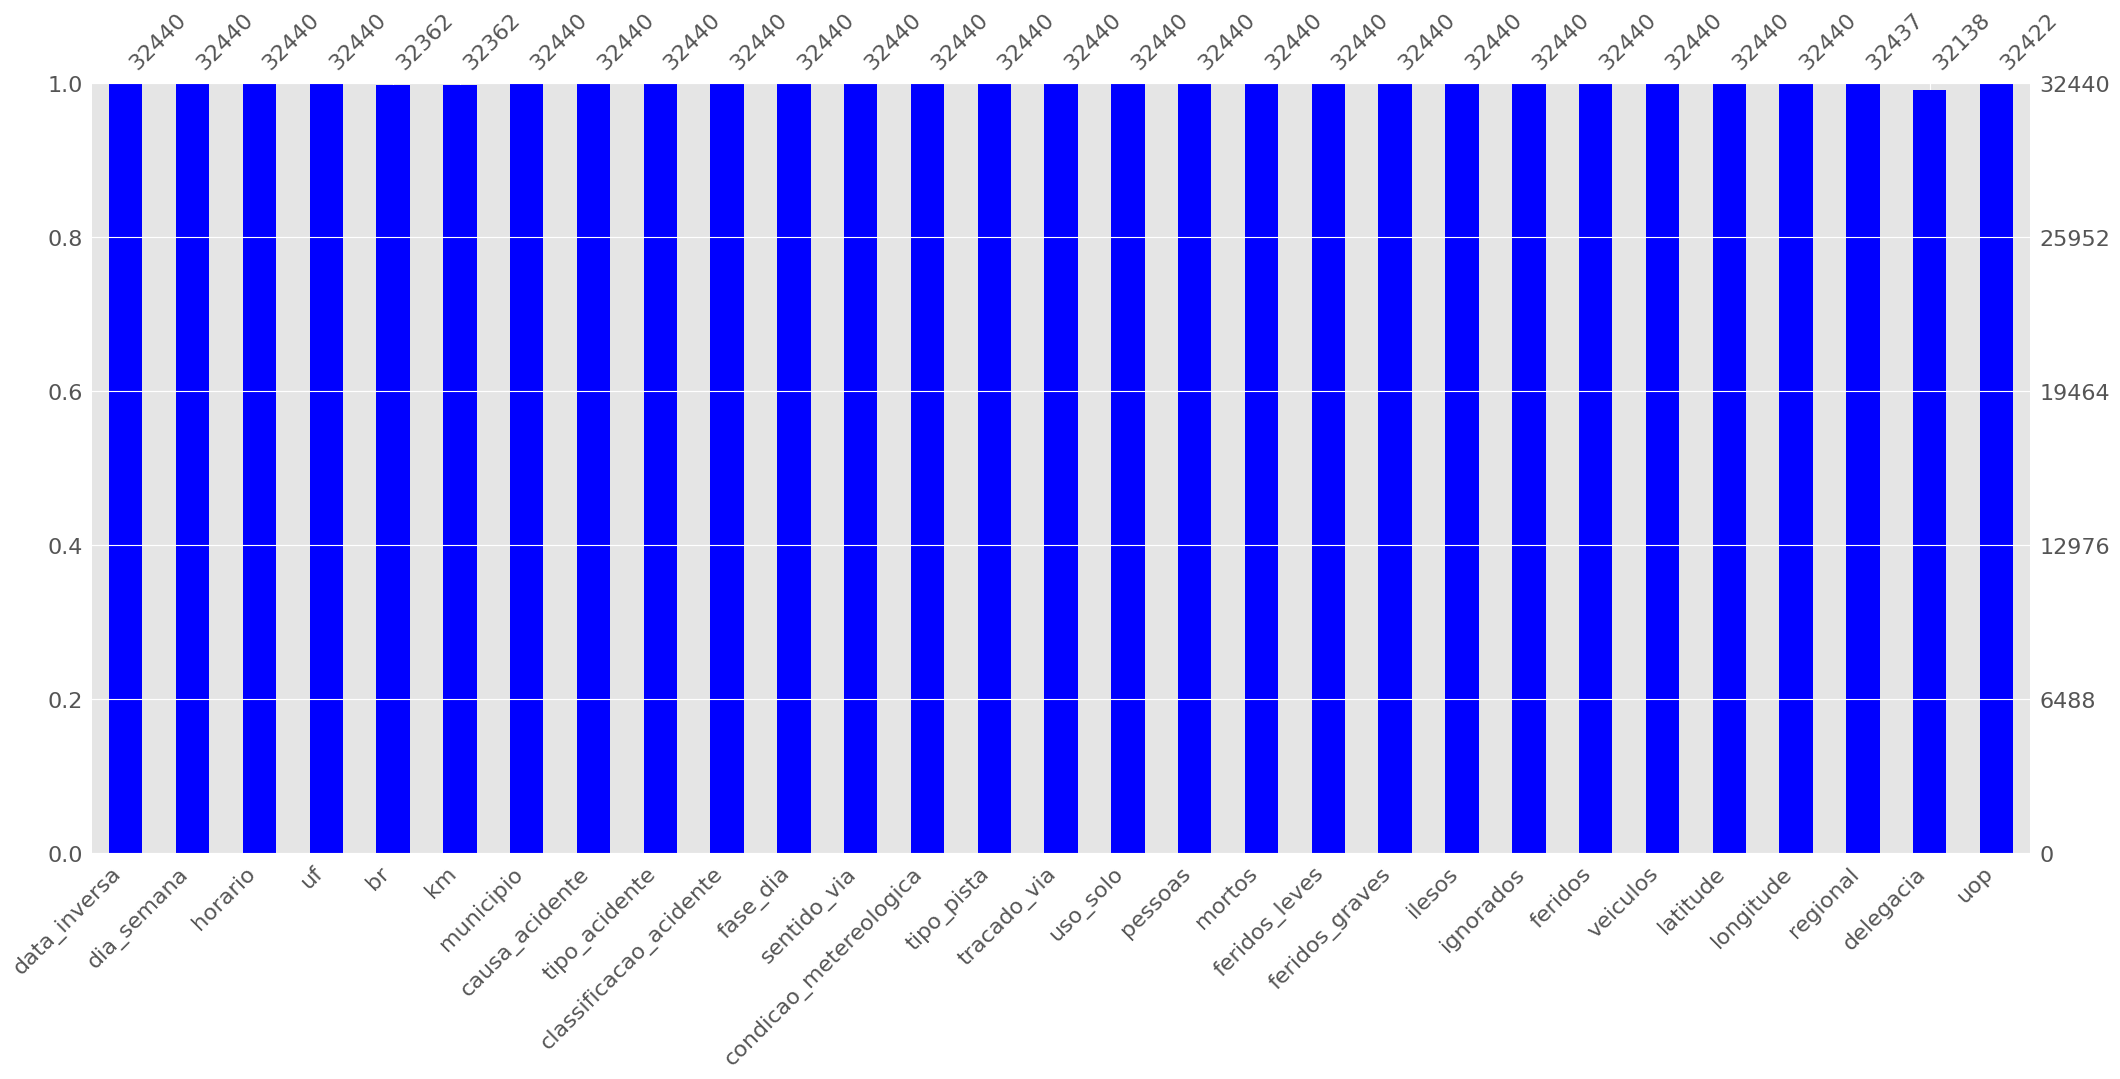

In [11]:
ms.bar(df, color = 'blue')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32440 entries, 0 to 32439
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_inversa            32440 non-null  object 
 1   dia_semana              32440 non-null  object 
 2   horario                 32440 non-null  object 
 3   uf                      32440 non-null  object 
 4   br                      32362 non-null  float64
 5   km                      32362 non-null  object 
 6   municipio               32440 non-null  object 
 7   causa_acidente          32440 non-null  object 
 8   tipo_acidente           32440 non-null  object 
 9   classificacao_acidente  32440 non-null  object 
 10  fase_dia                32440 non-null  object 
 11  sentido_via             32440 non-null  object 
 12  condicao_metereologica  32440 non-null  object 
 13  tipo_pista              32440 non-null  object 
 14  tracado_via             32440 non-null

### Transformando a coluna latitude e longitude para formato float

In [13]:
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.').astype(float)
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.').astype(float)
df.head()

data_inversa dia_semana   horario  uf     br     km          municipio  \
0   2023-01-01    domingo  02:00:00  ES  101.0    114          SOORETAMA   
1   2023-01-01    domingo  03:40:00  SP  116.0  113,1            TAUBATE   
2   2023-01-01    domingo  01:40:00  MT  163.0   1112  GUARANTA DO NORTE   
3   2023-01-01    domingo  10:40:00  PR  376.0  314,8         ORTIGUEIRA   
4   2023-01-01    domingo  14:55:00  MG  116.0  569,4           MANHUACU   

                             causa_acidente              tipo_acidente  \
0            Ausência de reação do condutor  Saída de leito carroçável   
1             Entrada inopinada do pedestre  Atropelamento de Pedestre   
2  Reação tardia ou ineficiente do condutor                 Tombamento   
3                   Velocidade Incompatível                 Tombamento   
4         Acumulo de água sobre o pavimento            Colisão frontal   

  classificacao_acidente     fase_dia  sentido_via condicao_metereologica  \
0    Com Vítimas Feridas  Plena Noite    Crescente              Céu Claro   
1     Com Vítimas Fatais  Plena Noite  Decrescente              Céu Claro   
2    Com Vítimas Feridas  Plena Noite    Crescente               Ignorado   
3            Sem Vítimas    Pleno dia    Crescente                    Sol   
4    Com Vítimas Feridas    Pleno dia  Decrescente                  Chuva   

  tipo_pista    tracado_via uso_solo  pessoas  mortos  feridos_leves  \
0    Simples           Reta      Não        1       0              1   
1      Dupla           Reta      Sim        5       1              0   
2    Simples  Não Informado      Não        1       0              0   
3      Dupla          Curva      Não        1       0              0   
4    Simples  Não Informado      Não        3       0              0   

   feridos_graves  ilesos  ignorados  feridos  veiculos   latitude  longitude  \
0               0       0          0        1         1 -19.094849 -40.050958   
1               0       0          4        0         1 -23.044566 -45.582598   
2               1       0          0        1         1  -9.700206 -54.875888   
3               0       1          0        0         1 -23.985512 -51.083555   
4               2       1          0        2         2 -20.100075 -42.178841   

  regional delegacia             uop  
0  SPRF-ES  DEL04-ES  UOP01-DEL04-ES  
1  SPRF-SP  DEL02-SP  UOP02-DEL02-SP  
2  SPRF-MT  DEL06-MT  UOP03-DEL06-MT  
3  SPRF-PR  DEL07-PR  UOP02-DEL07-PR  
4  SPRF-MG  DEL06-MG  UOP03-DEL06-MG

In [14]:
df['latitude'].info()
df['longitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32440 entries, 0 to 32439
Series name: latitude
Non-Null Count  Dtype  
--------------  -----  
32440 non-null  float64
dtypes: float64(1)
memory usage: 253.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 32440 entries, 0 to 32439
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
32440 non-null  float64
dtypes: float64(1)
memory usage: 253.6 KB


In [15]:
list(df.columns)

['data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'latitude',
 'longitude',
 'regional',
 'delegacia',
 'uop']

## <b> Estatisticas descritiva

In [16]:
df.shape

(32440, 29)

In [17]:
df.describe()

br       pessoas        mortos  feridos_leves  \
count  32362.000000  32440.000000  32440.000000   32440.000000   
mean     209.846147      2.457614      0.081936       0.874723   
std      129.455175      2.166629      0.325561       1.083875   
min       10.000000      1.000000      0.000000       0.000000   
25%      101.000000      1.000000      0.000000       0.000000   
50%      155.000000      2.000000      0.000000       1.000000   
75%      324.000000      3.000000      0.000000       1.000000   
max      495.000000     65.000000      7.000000      61.000000   

       feridos_graves        ilesos     ignorados       feridos      veiculos  \
count    32440.000000  32440.000000  32440.000000  32440.000000  32440.000000   
mean         0.277435      1.067109      0.156412      1.152158      1.664365   
std          0.617148      1.758439      0.443078      1.194990      0.720026   
min          0.000000      0.000000      0.000000      0.000000      1.000000   
25%          0.000000      0.000000      0.000000      1.000000      1.000000   
50%          0.000000      1.000000      0.000000      1.000000      2.000000   
75%          0.000000      1.000000      0.000000      1.000000      2.000000   
max         29.000000     58.000000     14.000000     62.000000     12.000000   

           latitude     longitude  
count  32440.000000  32440.000000  
mean     -19.069813    -46.563997  
std        7.702761      6.153457  
min      -33.588291    -69.503043  
25%      -25.363744    -50.439377  
50%      -20.620693    -47.545808  
75%      -12.912337    -42.570753  
max        4.383141    -34.828400

<b> vamos rodar o describe com include 'all' para obter uma análise prévia de estatistica geral mais completa

In [18]:
df.describe(include='all')

data_inversa dia_semana   horario     uf            br     km  \
count         32440      32440     32440  32440  32362.000000  32362   
unique          181          7      1307     27           NaN   6076   
top      2023-06-11    domingo  18:00:00     MG           NaN      1   
freq            248       5375       470   4234           NaN    152   
mean            NaN        NaN       NaN    NaN    209.846147    NaN   
std             NaN        NaN       NaN    NaN    129.455175    NaN   
min             NaN        NaN       NaN    NaN     10.000000    NaN   
25%             NaN        NaN       NaN    NaN    101.000000    NaN   
50%             NaN        NaN       NaN    NaN    155.000000    NaN   
75%             NaN        NaN       NaN    NaN    324.000000    NaN   
max             NaN        NaN       NaN    NaN    495.000000    NaN   

       municipio                            causa_acidente     tipo_acidente  \
count      32440                                     32440             32440   
unique      1705                                        71                16   
top     BRASILIA  Reação tardia ou ineficiente do condutor  Colisão traseira   
freq         464                                      4672              6179   
mean         NaN                                       NaN               NaN   
std          NaN                                       NaN               NaN   
min          NaN                                       NaN               NaN   
25%          NaN                                       NaN               NaN   
50%          NaN                                       NaN               NaN   
75%          NaN                                       NaN               NaN   
max          NaN                                       NaN               NaN   

       classificacao_acidente   fase_dia sentido_via condicao_metereologica  \
count                   32440      32440       32440                  32440   
unique                      3          4           3                      9   
top       Com Vítimas Feridas  Pleno dia   Crescente              Céu Claro   
freq                    24829      17746       17548                  20144   
mean                      NaN        NaN         NaN                    NaN   
std                       NaN        NaN         NaN                    NaN   
min                       NaN        NaN         NaN                    NaN   
25%                       NaN        NaN         NaN                    NaN   
50%                       NaN        NaN         NaN                    NaN   
75%                       NaN        NaN         NaN                    NaN   
max                       NaN        NaN         NaN                    NaN   

       tipo_pista tracado_via uso_solo       pessoas        mortos  \
count       32440       32440    32440  32440.000000  32440.000000   
unique          3          10        2           NaN           NaN   
top       Simples        Reta      Não           NaN           NaN   
freq        15971       18001    18903           NaN           NaN   
mean          NaN         NaN      NaN      2.457614      0.081936   
std           NaN         NaN      NaN      2.166629      0.325561   
min           NaN         NaN      NaN      1.000000      0.000000   
25%           NaN         NaN      NaN      1.000000      0.000000   
50%           NaN         NaN      NaN      2.000000      0.000000   
75%           NaN         NaN      NaN      3.000000      0.000000   
max           NaN         NaN      NaN     65.000000      7.000000   

        feridos_leves  feridos_graves        ilesos     ignorados  \
count    32440.000000    32440.000000  32440.000000  32440.000000   
unique            NaN             NaN           NaN           NaN   
top               NaN             NaN           NaN           NaN   
freq              NaN             NaN           NaN           NaN   
mean         0.874723        0.277435      1.0

- Quantidade de Observações: Existem 32.440 registros no conjunto de dados. Isso indica uma quantidade considerável de incidentes registrados.

- Valores Nulos: Algumas colunas, como br e km, têm menos observações do que o total de registros, indicando a presença de valores nulos.

- Incidentes por Dia: O dia com mais incidentes é o "domingo" (5.375 registros), o que pode indicar que os finais de semana têm uma frequência mais alta de incidentes ou que as pessoas viajam mais nesse dia.

- Localização dos Incidentes: A maioria dos incidentes ocorre em Minas Gerais (MG), com 4.234 registros.

- Causa mais Comum: A causa mais frequente de incidentes é a "Reação tardia ou ineficiente do condutor", ocorrendo 4.672 vezes.

- Tipo de Acidente mais Comum: A "Colisão traseira" é o tipo mais comum de acidente, ocorrendo 6.179 vezes.

- Quantidade de Veículos Envolvidos: Em média, cada incidente envolve aproximadamente 1,66 veículos.

- Vítimas: A média de feridos por incidente é de 1,15, com um máximo de 62 feridos em um único incidente. Além disso, a média de feridos graves por incidente é de 0,28.

- Distribuição de Incidentes ao Longo do Ano: O dia com o maior número de incidentes registrados é "2023-06-11", com 248 incidentes.

- Diversidade de Causas e Tipos: Há 71 causas diferentes de acidentes e 16 tipos diferentes de acidentes listados no conjunto de dados.

#### Agora vamos analizar as 5 BRs que mais aconteceram acidentes com vítimas fatais

In [19]:
# Listando as BRs pertencente a coluna 'br'
unique_brs = df['br'].unique()
unique_brs

array([101., 116., 163., 376., 262., 381., 465., 392., 316.,  50., 365.,
       290., 386.,  40., 324., 364., 407., 210., 412., 428., 280., 470.,
        20., 480., 158., 153., 222., 277., 282., 251.,  70., 459., 259.,
       493., 230., 110., 343., 242., 285.,  60., 319., 174., 232., 467.,
       405., 476.,  10., 410., 423., 155., 287., 393., 421., 452., 356.,
       472., 414., 135., 435., 373., 432., 226., 369., 354., 267.,  nan,
       408., 359., 471., 349., 304., 424., 463., 293.,  80., 146., 235.,
        30., 104., 468., 448., 430., 406., 330., 415., 402., 361., 487.,
       272., 427., 367., 495., 122., 419., 429., 401., 420., 436., 308.,
       317., 156., 469., 418., 425., 416., 488., 447., 437., 434., 352.,
       342., 403., 433., 485., 422.])

In [20]:
### Filtro das 5 BRs com mais acidentes fatáis

In [21]:
fatais_br = df.groupby('br')['mortos'].sum().reset_index()
fatais_br.columns = ['br', 'vitimas_total']

fatais_max5br = fatais_br.sort_values(by='vitimas_total', ascending=False).head(5)

print(fatais_max5br['br'].tolist())


[116.0, 101.0, 163.0, 153.0, 40.0]


In [22]:
total_vitimas_fatais_top5br = fatais_max5br['vitimas_total'].sum()
print(f"Total de vitimás fatais nas 5 rodovias com mais vitimás: {total_vitimas_fatais_top5br} vítimas fatais")


Total de vitimás fatais nas 5 rodovias com mais vitimás: 1050 vítimas fatais


In [23]:
#Filtrando as quantidades de vítimas em cada uma delas
for index, row in fatais_max5br.iterrows():
    br_numero = row['br']
    vitimas_total = row['vitimas_total']
    print(f"Rodovia BR-{br_numero}: {vitimas_total} vitimas fatais")


Rodovia BR-116.0: 371.0 vitimas fatais
Rodovia BR-101.0: 331.0 vitimas fatais
Rodovia BR-163.0: 125.0 vitimas fatais
Rodovia BR-153.0: 121.0 vitimas fatais
Rodovia BR-40.0: 102.0 vitimas fatais


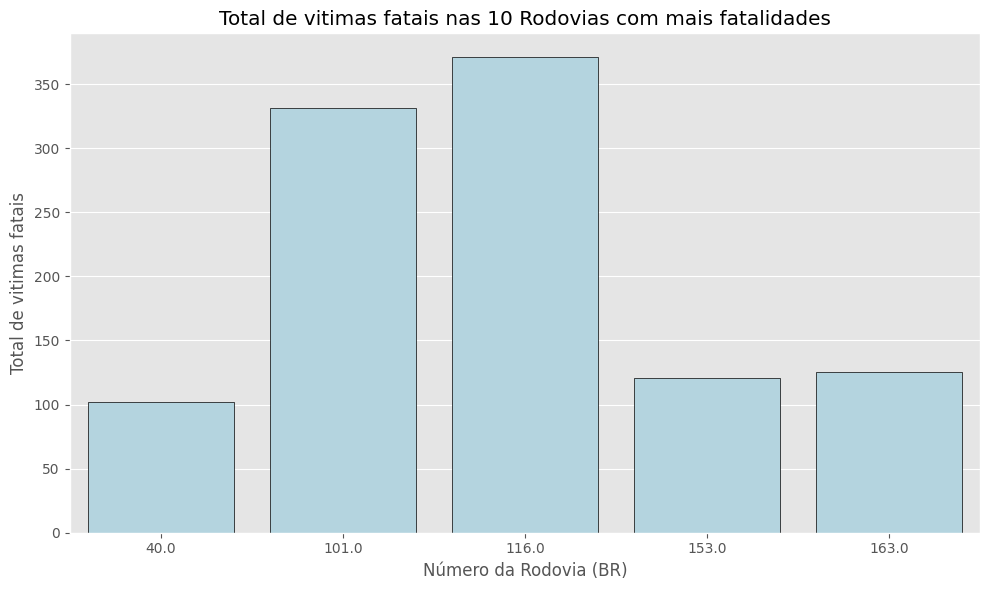

In [24]:
# gráfico de barras com os 5 números de rodovias com mais vitimas fatáis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='br', y='vitimas_total', data=fatais_max5br, color='lightblue', edgecolor='black')
plt.title('Total de vitimas fatais nas 10 Rodovias com mais fatalidades')
plt.xlabel('Número da Rodovia (BR)')
plt.ylabel('Total de vitimas fatais')
plt.tight_layout()
plt.show()

### Podemos observar que a Br com o maior casos de acidentes com vítimas fátais é a Br-116 com mais de 370 vítimas fatáis. nesse período

#### Média da somatória das 5 BRs mais fatais

In [25]:
for index, row in fatais_max5br.iterrows():
    br_numero = row['br']
    vitimas_total = row['vitimas_total']
    print(f"Rodovia BR-{br_numero}: {vitimas_total} vitimas fatais")
media = fatais_max5br.mean()
media
mediana = fatais_max5br.median()
print(f"Mediana - {mediana} Média - {media}")

Rodovia BR-116.0: 371.0 vitimas fatais
Rodovia BR-101.0: 331.0 vitimas fatais
Rodovia BR-163.0: 125.0 vitimas fatais
Rodovia BR-153.0: 121.0 vitimas fatais
Rodovia BR-40.0: 102.0 vitimas fatais
Mediana - br               116.0
vitimas_total    125.0
dtype: float64 Média - br               114.6
vitimas_total    210.0
dtype: float64


a media entre as 5 Brs está em 210 vítimas fatáis.

## Agora vamos ver a correlacionar os dados de 2022 com os de 2023 
### para isso vamos importar os dados de 2022

In [26]:
df22 = pd.read_csv('datatran2022.csv', sep=';', encoding='latin1')
df22.head()

id data_inversa dia_semana   horario  uf     br     km  \
0  405151   2022-01-01     sábado  01:35:00  PI  316.0    415   
1  405158   2022-01-01     sábado  02:40:00  PR  116.0     33   
2  405172   2022-01-01     sábado  05:22:00  MS  163.0    393   
3  405203   2022-01-01     sábado  07:00:00  RJ  101.0    457   
4  405207   2022-01-01     sábado  09:00:00  MG   40.0  508,3   

               municipio                                     causa_acidente  \
0            MARCOLANDIA                   Ingestão de álcool pelo condutor   
1  CAMPINA GRANDE DO SUL                   Ingestão de álcool pelo condutor   
2   NOVA ALVORADA DO SUL  Condutor deixou de manter distância do veículo...   
3         ANGRA DOS REIS           Reação tardia ou ineficiente do condutor   
4     RIBEIRAO DAS NEVES                  Acumulo de água sobre o pavimento   

               tipo_acidente classificacao_acidente     fase_dia  sentido_via  \
0           Colisão traseira    Com Vítimas Feridas  Plena Noite  Decrescente   
1                 Tombamento     Com Vítimas Fatais    Pleno dia  Decrescente   
2           Colisão traseira    Com Vítimas Feridas    Amanhecer  Decrescente   
3            Colisão frontal    Com Vítimas Feridas    Pleno dia  Decrescente   
4  Saída de leito carroçável            Sem Vítimas    Pleno dia  Decrescente   

  condicao_metereologica tipo_pista    tracado_via uso_solo  pessoas  mortos  \
0                Nublado    Simples           Reta      Sim        2       0   
1                Nublado      Dupla          Curva      Não        2       1   
2              Céu Claro    Simples  Não Informado      Não        2       0   
3                  Chuva    Simples          Curva      Sim        2       0   
4                  Chuva      Dupla           Reta      Sim        3       0   

   feridos_leves  feridos_graves  ilesos  ignorados  feridos  veiculos  \
0              1               0       1          0        1         2   
1              1               0       0          0        1         1   
2              1               0       1          0        1         2   
3              0               1       1          0        1         2   
4              0               0       3          0        0         1   

       latitude     longitude regional delegacia             uop  
0   -7,43280012  -40,68261908  SPRF-PI  DEL04-PI  UOP03-DEL04-PI  
1    -25,114403   -48,8467554  SPRF-PR  DEL01-PR  UOP02-DEL01-PR  
2    -21,228445    -54,456296  SPRF-MS  DEL02-MS  UOP01-DEL02-MS  
3  -23,03149804  -44,17715297  SPRF-RJ  DEL03-RJ  UOP02-DEL03-RJ  
4  -19,76061249   -44,1347544  SPRF-MG  DEL02-MG  UOP01-DEL02-MG

### LImpeza dos dados

In [27]:
df22.drop('id', axis = 1, inplace = True)

In [28]:
# verificação de linhas duplicadas
duplicadas = df22.duplicated().sum()
print(f"Temos {duplicadas} linhas duplicadas")

Temos 4 linhas duplicadas


In [29]:
# Removendo as linhas duplicadas
df22_sem_duplicatas = df22.drop_duplicates()

# Verificando quantas linhas foram removidas
linhas_duplicadas = len(df22) - len(df22_sem_duplicatas)

print(f"Foram removidas {linhas_duplicadas} linhas duplicadas.")
df22_sem_duplicatas

Foram removidas 4 linhas duplicadas.


data_inversa    dia_semana   horario  uf     br     km  \
0       2022-01-01        sábado  01:35:00  PI  316.0    415   
1       2022-01-01        sábado  02:40:00  PR  116.0     33   
2       2022-01-01        sábado  05:22:00  MS  163.0    393   
3       2022-01-01        sábado  07:00:00  RJ  101.0    457   
4       2022-01-01        sábado  09:00:00  MG   40.0  508,3   
...            ...           ...       ...  ..    ...    ...   
64542   2022-11-06       domingo  20:00:00  PI  316.0    313   
64543   2022-05-03   terça-feira  02:30:00  ES  262.0     17   
64544   2022-11-29   terça-feira  19:00:00  MG  146.0    459   
64545   2022-07-31       domingo  09:54:00  CE  116.0      5   
64546   2022-11-17  quinta-feira  18:13:00  PR  277.0   11,8   

                   municipio  \
0                MARCOLANDIA   
1      CAMPINA GRANDE DO SUL   
2       NOVA ALVORADA DO SUL   
3             ANGRA DOS REIS   
4         RIBEIRAO DAS NEVES   
...                      ...   
64542                  PICOS   
64543                  VIANA   
64544               BOTELHOS   
64545              FORTALEZA   
64546              PARANAGUA   

                                          causa_acidente  \
0                       Ingestão de álcool pelo condutor   
1                       Ingestão de álcool pelo condutor   
2      Condutor deixou de manter distância do veículo...   
3               Reação tardia ou ineficiente do condutor   
4                      Acumulo de água sobre o pavimento   
...                                                  ...   
64542                     Ausência de reação do condutor   
64543                            Velocidade Incompatível   
64544                             Transitar na contramão   
64545                        Manobra de mudança de faixa   
64546                                   Animais na Pista   

                   tipo_acidente classificacao_acidente     fase_dia  \
0               Colisão traseira    Com Vítimas Feridas  Plena Noite   
1                     Tombamento     Com Vítimas Fatais    Pleno dia   
2               Colisão traseira    Com Vítimas Feridas    Amanhecer   
3                Colisão frontal    Com Vítimas Feridas    Pleno dia   
4      Saída de leito carroçável            Sem Vítimas    Pleno dia   
...                          ...                    ...          ...   
64542        Colisão transversal    Com Vítimas Feridas  Plena Noite   
64543  Saída de leito carroçável            Sem Vítimas  Plena Noite   
64544            Colisão frontal    Com Vítimas Feridas  Plena Noite   
64545                 Tombamento    Com Vítimas Feridas    Pleno dia   
64546    Atropelamento de Animal    Com Vítimas Feridas    Anoitecer   

       sentido_via condicao_metereologica tipo_pista    tracado_via uso_solo  \
0      Decrescente                Nublado    Simples           Reta      Sim   
1      Decrescente                Nublado      Dupla          Curva      Não   
2      Decrescente              Céu Claro    Simples  Não Informado      Não   
3      Decrescente                  Chuva    Simples          Curva      Sim   
4      Decrescente                  Chuva      Dupla           Reta      Sim   
...            ...                    ...        ...            ...      ...   
64542    Crescente                Nublado      Dupla           Reta      Sim   
64543    Crescente              Céu Claro    Simples          Curva      Sim   
64544    Crescente                  Chuva    Simples           Reta      Não   
64545  Decrescente              Céu Claro   Múltipla           Reta      Sim   
64546    Crescente                    Sol      Dupla           Reta      Sim   

       pessoas  mortos  feridos_leves  feridos_graves  ilesos  ignorados  \
0            2       0              1               0       1          0   
1            2       1              1               0       0          0   
2            2       0              1               0       1          0   
3

In [30]:
df22.isnull().sum().sort_values(ascending=False)[:10]

delegacia    759
br           197
km           197
uop           48
regional       3
pessoas        0
longitude      0
latitude       0
veiculos       0
feridos        0
dtype: int64

In [31]:
# Prenchendo posivéis valores nulos com zero
df22_fillna_zero = df22.fillna(df22.mean())
df22_fillna_zero

C:\Users\Rodrigo Gomes\AppData\Local\Temp\ipykernel_1436\220028006.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df22_fillna_zero = df22.fillna(df22.mean())


data_inversa    dia_semana   horario  uf     br     km  \
0       2022-01-01        sábado  01:35:00  PI  316.0    415   
1       2022-01-01        sábado  02:40:00  PR  116.0     33   
2       2022-01-01        sábado  05:22:00  MS  163.0    393   
3       2022-01-01        sábado  07:00:00  RJ  101.0    457   
4       2022-01-01        sábado  09:00:00  MG   40.0  508,3   
...            ...           ...       ...  ..    ...    ...   
64542   2022-11-06       domingo  20:00:00  PI  316.0    313   
64543   2022-05-03   terça-feira  02:30:00  ES  262.0     17   
64544   2022-11-29   terça-feira  19:00:00  MG  146.0    459   
64545   2022-07-31       domingo  09:54:00  CE  116.0      5   
64546   2022-11-17  quinta-feira  18:13:00  PR  277.0   11,8   

                   municipio  \
0                MARCOLANDIA   
1      CAMPINA GRANDE DO SUL   
2       NOVA ALVORADA DO SUL   
3             ANGRA DOS REIS   
4         RIBEIRAO DAS NEVES   
...                      ...   
64542                  PICOS   
64543                  VIANA   
64544               BOTELHOS   
64545              FORTALEZA   
64546              PARANAGUA   

                                          causa_acidente  \
0                       Ingestão de álcool pelo condutor   
1                       Ingestão de álcool pelo condutor   
2      Condutor deixou de manter distância do veículo...   
3               Reação tardia ou ineficiente do condutor   
4                      Acumulo de água sobre o pavimento   
...                                                  ...   
64542                     Ausência de reação do condutor   
64543                            Velocidade Incompatível   
64544                             Transitar na contramão   
64545                        Manobra de mudança de faixa   
64546                                   Animais na Pista   

                   tipo_acidente classificacao_acidente     fase_dia  \
0               Colisão traseira    Com Vítimas Feridas  Plena Noite   
1                     Tombamento     Com Vítimas Fatais    Pleno dia   
2               Colisão traseira    Com Vítimas Feridas    Amanhecer   
3                Colisão frontal    Com Vítimas Feridas    Pleno dia   
4      Saída de leito carroçável            Sem Vítimas    Pleno dia   
...                          ...                    ...          ...   
64542        Colisão transversal    Com Vítimas Feridas  Plena Noite   
64543  Saída de leito carroçável            Sem Vítimas  Plena Noite   
64544            Colisão frontal    Com Vítimas Feridas  Plena Noite   
64545                 Tombamento    Com Vítimas Feridas    Pleno dia   
64546    Atropelamento de Animal    Com Vítimas Feridas    Anoitecer   

       sentido_via condicao_metereologica tipo_pista    tracado_via uso_solo  \
0      Decrescente                Nublado    Simples           Reta      Sim   
1      Decrescente                Nublado      Dupla          Curva      Não   
2      Decrescente              Céu Claro    Simples  Não Informado      Não   
3      Decrescente                  Chuva    Simples          Curva      Sim   
4      Decrescente                  Chuva      Dupla           Reta      Sim   
...            ...                    ...        ...            ...      ...   
64542    Crescente                Nublado      Dupla           Reta      Sim   
64543    Crescente              Céu Claro    Simples          Curva      Sim   
64544    Crescente                  Chuva    Simples           Reta      Não   
64545  Decrescente              Céu Claro   Múltipla           Reta      Sim   
64546    Crescente                    Sol      Dupla           Reta      Sim   

       pessoas  mortos  feridos_leves  feridos_graves  ilesos  ignorados  \
0            2       0              1               0       1          0   
1            2       1              1               0       0          0   
2            2       0              1               0       1          0   
3

### formatando longitude e latitude

In [32]:
df22['longitude'] = df22['longitude'].astype(str).str.replace(',', '.').astype(float)
df22['latitude'] = df22['latitude'].astype(str).str.replace(',', '.').astype(float)
df22.head()

data_inversa dia_semana   horario  uf     br     km              municipio  \
0   2022-01-01     sábado  01:35:00  PI  316.0    415            MARCOLANDIA   
1   2022-01-01     sábado  02:40:00  PR  116.0     33  CAMPINA GRANDE DO SUL   
2   2022-01-01     sábado  05:22:00  MS  163.0    393   NOVA ALVORADA DO SUL   
3   2022-01-01     sábado  07:00:00  RJ  101.0    457         ANGRA DOS REIS   
4   2022-01-01     sábado  09:00:00  MG   40.0  508,3     RIBEIRAO DAS NEVES   

                                      causa_acidente  \
0                   Ingestão de álcool pelo condutor   
1                   Ingestão de álcool pelo condutor   
2  Condutor deixou de manter distância do veículo...   
3           Reação tardia ou ineficiente do condutor   
4                  Acumulo de água sobre o pavimento   

               tipo_acidente classificacao_acidente     fase_dia  sentido_via  \
0           Colisão traseira    Com Vítimas Feridas  Plena Noite  Decrescente   
1                 Tombamento     Com Vítimas Fatais    Pleno dia  Decrescente   
2           Colisão traseira    Com Vítimas Feridas    Amanhecer  Decrescente   
3            Colisão frontal    Com Vítimas Feridas    Pleno dia  Decrescente   
4  Saída de leito carroçável            Sem Vítimas    Pleno dia  Decrescente   

  condicao_metereologica tipo_pista    tracado_via uso_solo  pessoas  mortos  \
0                Nublado    Simples           Reta      Sim        2       0   
1                Nublado      Dupla          Curva      Não        2       1   
2              Céu Claro    Simples  Não Informado      Não        2       0   
3                  Chuva    Simples          Curva      Sim        2       0   
4                  Chuva      Dupla           Reta      Sim        3       0   

   feridos_leves  feridos_graves  ilesos  ignorados  feridos  veiculos  \
0              1               0       1          0        1         2   
1              1               0       0          0        1         1   
2              1               0       1          0        1         2   
3              0               1       1          0        1         2   
4              0               0       3          0        0         1   

    latitude  longitude regional delegacia             uop  
0  -7.432800 -40.682619  SPRF-PI  DEL04-PI  UOP03-DEL04-PI  
1 -25.114403 -48.846755  SPRF-PR  DEL01-PR  UOP02-DEL01-PR  
2 -21.228445 -54.456296  SPRF-MS  DEL02-MS  UOP01-DEL02-MS  
3 -23.031498 -44.177153  SPRF-RJ  DEL03-RJ  UOP02-DEL03-RJ  
4 -19.760612 -44.134754  SPRF-MG  DEL02-MG  UOP01-DEL02-MG

### Filtrando o primeiro semestre

In [33]:
# 'data_inversa' para o tipo de data
df22['data_inversa'] = pd.to_datetime(df22['data_inversa'])

# Filtrar o primeiro semestre
primeiro_semestre22 = df22[(df22['data_inversa'].dt.month >= 1) & (df22['data_inversa'].dt.month <= 6)]
primeiro_semestre22.head()

data_inversa dia_semana   horario  uf     br     km              municipio  \
0   2022-01-01     sábado  01:35:00  PI  316.0    415            MARCOLANDIA   
1   2022-01-01     sábado  02:40:00  PR  116.0     33  CAMPINA GRANDE DO SUL   
2   2022-01-01     sábado  05:22:00  MS  163.0    393   NOVA ALVORADA DO SUL   
3   2022-01-01     sábado  07:00:00  RJ  101.0    457         ANGRA DOS REIS   
4   2022-01-01     sábado  09:00:00  MG   40.0  508,3     RIBEIRAO DAS NEVES   

                                      causa_acidente  \
0                   Ingestão de álcool pelo condutor   
1                   Ingestão de álcool pelo condutor   
2  Condutor deixou de manter distância do veículo...   
3           Reação tardia ou ineficiente do condutor   
4                  Acumulo de água sobre o pavimento   

               tipo_acidente classificacao_acidente     fase_dia  sentido_via  \
0           Colisão traseira    Com Vítimas Feridas  Plena Noite  Decrescente   
1                 Tombamento     Com Vítimas Fatais    Pleno dia  Decrescente   
2           Colisão traseira    Com Vítimas Feridas    Amanhecer  Decrescente   
3            Colisão frontal    Com Vítimas Feridas    Pleno dia  Decrescente   
4  Saída de leito carroçável            Sem Vítimas    Pleno dia  Decrescente   

  condicao_metereologica tipo_pista    tracado_via uso_solo  pessoas  mortos  \
0                Nublado    Simples           Reta      Sim        2       0   
1                Nublado      Dupla          Curva      Não        2       1   
2              Céu Claro    Simples  Não Informado      Não        2       0   
3                  Chuva    Simples          Curva      Sim        2       0   
4                  Chuva      Dupla           Reta      Sim        3       0   

   feridos_leves  feridos_graves  ilesos  ignorados  feridos  veiculos  \
0              1               0       1          0        1         2   
1              1               0       0          0        1         1   
2              1               0       1          0        1         2   
3              0               1       1          0        1         2   
4              0               0       3          0        0         1   

    latitude  longitude regional delegacia             uop  
0  -7.432800 -40.682619  SPRF-PI  DEL04-PI  UOP03-DEL04-PI  
1 -25.114403 -48.846755  SPRF-PR  DEL01-PR  UOP02-DEL01-PR  
2 -21.228445 -54.456296  SPRF-MS  DEL02-MS  UOP01-DEL02-MS  
3 -23.031498 -44.177153  SPRF-RJ  DEL03-RJ  UOP02-DEL03-RJ  
4 -19.760612 -44.134754  SPRF-MG  DEL02-MG  UOP01-DEL02-MG

#### Usando o heatmap vamos correlacionar as duas planilhas e análizar suas correlações filtrando apenas dados numéricos

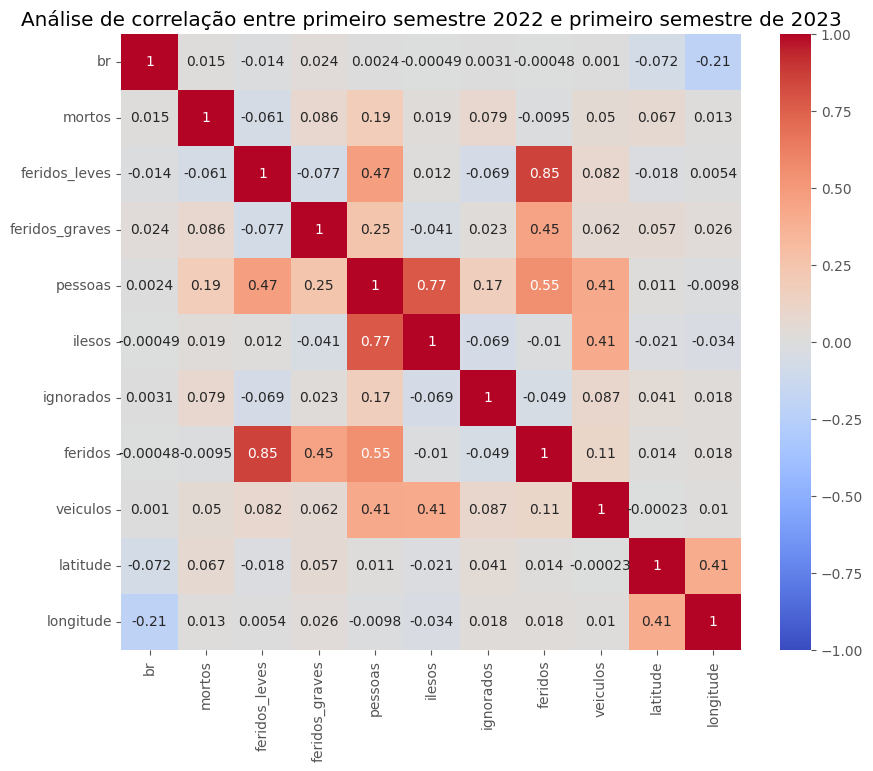

In [52]:
# combinando colunas relevantes
df1_relevantes = df[['br','mortos', 'feridos_leves', 'feridos_graves','pessoas','ilesos','ignorados','feridos','veiculos','latitude','longitude']]
df2_relevantes = primeiro_semestre22[['br','mortos', 'feridos_leves', 'feridos_graves','pessoas','ilesos','ignorados','feridos','veiculos','latitude','longitude']]

# Combina os dados relevantes em uma variável só
df_combined = pd.concat([df1_relevantes, df2_relevantes], axis=0)

# Calculo correlação
matriz_correlacao = df_combined.corr()

# Gráfico de matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Rótulos dos eixos e o título
plt.title('Análise de correlação entre primeiro semestre 2022 e primeiro semestre de 2023')
plt.show()


#### Podemos perceber que temos uma forte correlação positiva na coluna dos dados de Feridos e Feridos leves, podemos concluir que a maior parte dos acidentes tem feridos leves nas nossas rodovias.

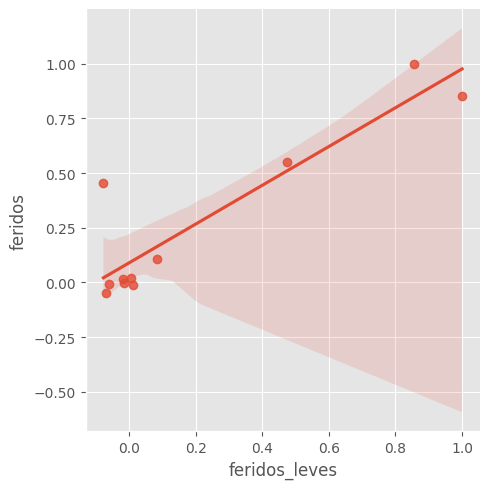

In [38]:
# Linearidade entre feridos e feridos leves
sns.lmplot(x='feridos_leves', y='feridos', data=matriz_correlacao);

#### Comparação com feridos graves e feridos.

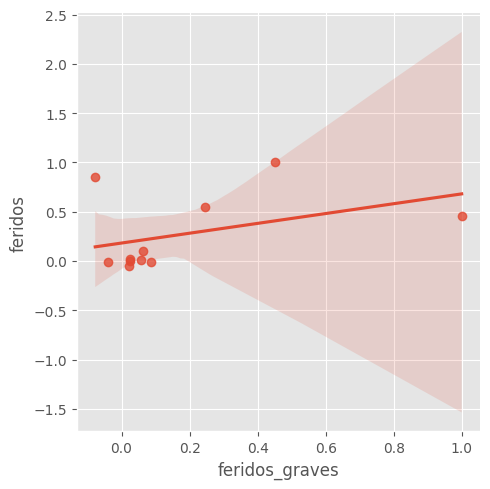

In [42]:
sns.lmplot(x='feridos_graves', y='feridos', data=matriz_correlacao);

#### Podemos perceber também que aparece baixa correlação entre a coluna Br e as outras colunas, mostrando que há outros fatores mais importantes e significativos para ocorrer um acidente e não em que rodovia o veículo está transitando.

# Análise geográfica

C:\Users\Rodrigo Gomes\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\Rodrigo Gomes\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\Rodrigo Gomes\AppData\Roaming\Python\Python39\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\Rodrigo Gomes\AppData\Roaming\Python\Python39\site-packages\descartes\patch.py:64: Shapel

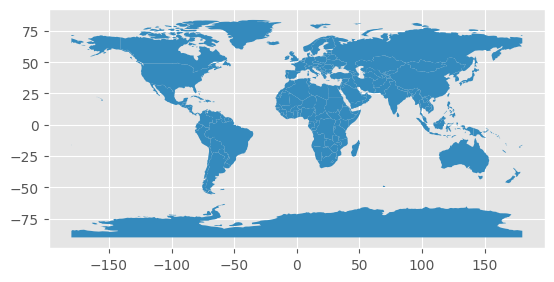

In [62]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'));

world.plot();

### vamos filtrar somente o Brasil

C:\Users\Rodrigo Gomes\AppData\Roaming\Python\Python39\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


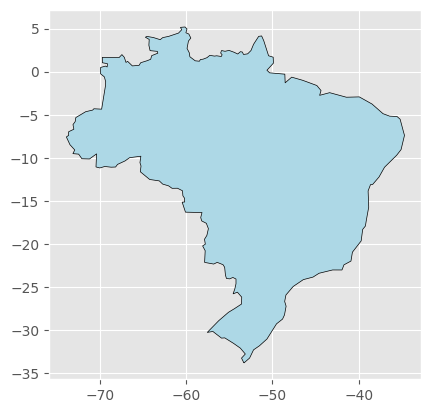

In [63]:
brasil = world[world["name"] == 'Brazil'];
brasil.plot(color='lightblue', edgecolor='black');

#### Gerando as localizações dos registros de acidentes no mapa 

C:\Users\Rodrigo Gomes\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\Rodrigo Gomes\AppData\Roaming\Python\Python39\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


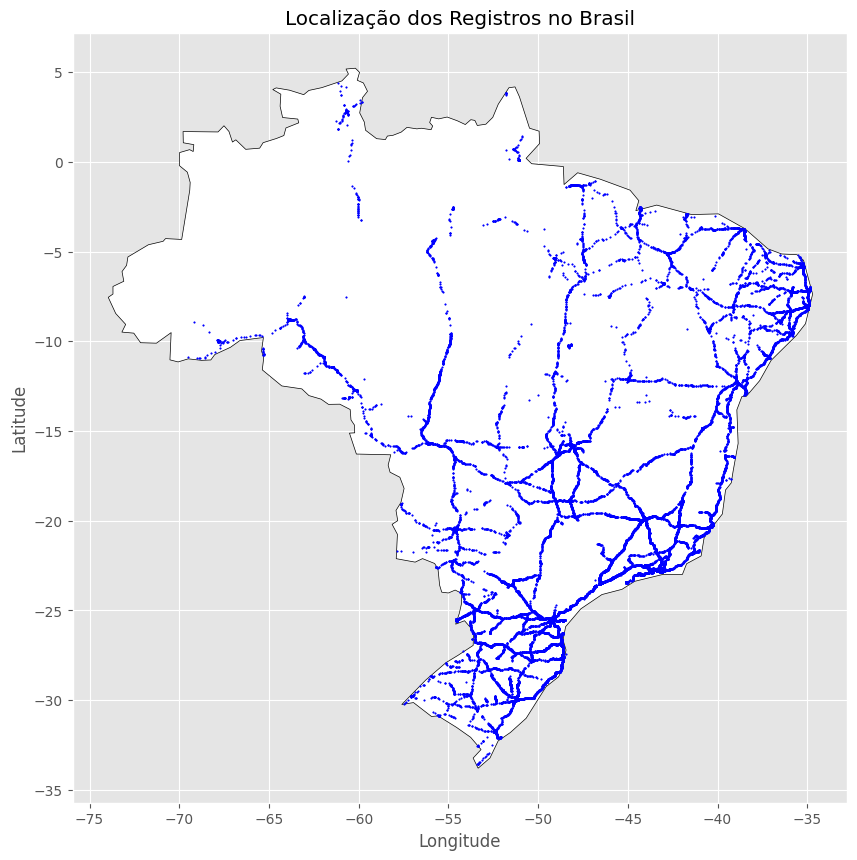

In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carrega o mapa do Brasil
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brasil = world[world.name == "Brazil"]
data = df
data_map = data.dropna(subset=['latitude', 'longitude'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(data_map['longitude'], data_map['latitude'], color='blue', s=1)
plt.title('Localização dos Registros no Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Criando pontos dos acidentes no Brasil

In [108]:
import folium

# Amostra de um subconjunto de dados para garantir o desempenho
sample_data = data_map.sample(min(1000, len(data_map)))

# Mapa Brasil
mBrasil = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)  # Centralização Brasília

# adiciona marcadores nos registros de dados da amostra
for idx, row in sample_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['causa_acidente'],
        icon=folium.Icon(icon="circle", color="blue", prefix='fa')
    ).add_to(mBrasil)

mBrasil

#### Aqui podemos ver cada registro e qual causa dos acidentes, percebemos que as maiores concentrações estão na região Sudeste.

### Agora separaremos os acidentes fatais para verificar a distribuição no mapa

In [86]:
# Mapa Brasil
m_marcadores_sep = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)  # zoon Brasília

# marcadores para registros e marcadores para acidentes com vitimas fatais
for idx, row in sample_data.iterrows():
    if "Com Vítimas Fatais" in row['classificacao_acidente']:
        icon_color = "red"
        icon_type = "times"
        folium.Marker(
            location=[row['latitude'], row['longitude']], #marcando local pela latitude e longitude
            popup=row['causa_acidente'], # add coluna de classificação do acidente
            icon=folium.Icon(icon=icon_type, color=icon_color, prefix='fa')
        ).add_to(m_marcadores_sep)
        # se não for fatal
    else:
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        ).add_to(m_marcadores_sep)

m_marcadores_sep

#### vamos filtrar a principal causa de acidentes fatais 

In [100]:
causa_acidentes = df.groupby('causa_acidente')['mortos'].count()
causa_max_acidentes = causa_acidentes.idxmax()


causa_max_acidentes

'Reação tardia ou ineficiente do condutor'

#### Vemos que a causa principal de acidentes com vítimas fatais é "Reação tardia ou ineficiente do condutor" confirmando o describe das estatisticas anteriores.

# Dados de radáres da PRF
### vamos plotar tambem o mapa dos dados de radáres que a PRF disponibiliza

In [130]:
# Buscando os dados

In [166]:
df_radar = pd.read_csv('recurso__7649663_json (1).csv')
df_radar.shape

(608, 14)

In [167]:
df_radar.head()

concessionaria  ano_do_pnv_snv tipo_de_radar rodovia  uf     km_m  \
0  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  483,700   
1  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  493,290   
2  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  525,350   
3  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  528,350   
4  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  568,890   

    municipio tipo_pista      sentido situacao  data_da_inativacao  \
0       Betim  Principal    Crescente    Ativo                 NaN   
1       Betim  Principal    Crescente    Ativo                 NaN   
2  Brumadinho  Principal    Crescente    Ativo                 NaN   
3  Brumadinho  Principal  Decrescente    Ativo                 NaN   
4    Itaguara  Principal  Decrescente    Ativo                 NaN   

     latitude   longitude  velocidade_leve  
0  -19,959486  -44,085386               80  
1  -19,964349  -44,171924               80  
2  -20,146664  -44,323897               80  
3  -20,167194  -44,334434               80  
4  -20,410679  -44,526628               80

#### Formatando latitude e longitude

In [184]:
df_radar['longitude'] = df22['longitude'].astype(str).str.replace(',', '.').astype(float)
df_radar['latitude'] = df22['latitude'].astype(str).str.replace(',', '.').astype(float)
df_radar.head()

concessionaria  ano_do_pnv_snv tipo_de_radar rodovia  uf     km_m  \
0  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  483,700   
1  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  493,290   
2  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  525,350   
3  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  528,350   
4  AUTOPISTA FERNÃO DIAS            2007   Controlador  BR-381  MG  568,890   

    municipio tipo_pista      sentido situacao  data_da_inativacao   latitude  \
0       Betim  Principal    Crescente    Ativo                 NaN  -7.432800   
1       Betim  Principal    Crescente    Ativo                 NaN -25.114403   
2  Brumadinho  Principal    Crescente    Ativo                 NaN -21.228445   
3  Brumadinho  Principal  Decrescente    Ativo                 NaN -23.031498   
4    Itaguara  Principal  Decrescente    Ativo                 NaN -19.760612   

   longitude  velocidade_leve  
0 -40.682619               80  
1 -48.846755               80  
2 -54.456296               80  
3 -44.177153               80  
4 -44.134754               80

In [170]:
import folium

# Criando o mapa novamente
mapa_radar = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)

# Adicionando os pontos referentes aos radares no mapa
for _, radar in df_radar.iterrows():
    folium.Marker(
        location=[radar['latitude'], radar['longitude']],
        popup=f"Rodovia: {radar['rodovia']} - Km: {radar['km_m']}",
        icon=folium.Icon(icon="cloud", prefix='fa'),
    ).add_to(mapa_radar)

mapa_radar

## Agora vamos plotar o mapa de acidentes com radáres

#### Para isso vamos filtrar os acidentes

In [158]:
acid_filtro = df[(df['classificacao_acidente'] == 'Com Vítimas Fatais')]
acid_filtro.shape

(2319, 30)

In [161]:
acid_filtro[['causa_acidente','classificacao_acidente','feridos','feridos_graves','mortos']].head()

causa_acidente classificacao_acidente  feridos  \
1              Entrada inopinada do pedestre     Com Vítimas Fatais        0   
12             Entrada inopinada do pedestre     Com Vítimas Fatais        0   
22                    Transitar na contramão     Com Vítimas Fatais        3   
24  Reação tardia ou ineficiente do condutor     Com Vítimas Fatais        0   
27                    Transitar na contramão     Com Vítimas Fatais        2   

    feridos_graves  mortos  
1                0       1  
12               0       1  
22               2       2  
24               0       1  
27               1       1

### Plotanto Mapa

In [171]:
# mapa central
mapa_acidentes_radares = folium.Map(location=[-15.77972, -47.92972], zoom_start=5)

# pontos acidentes
for _, acidente in acid_filtro.iterrows():
    folium.CircleMarker(
        location=[acidente['latitude'], acidente['longitude']],
        radius=5,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
        popup=f"Rodovia: {acidente['br']} - Km: {acidente['km']} - Acidente: {acidente['classificacao_acidente']} - Causa: {acidente['causa_acidente']}"
    ).add_to(mapa_acidentes_radares)

# Adicionando os pontos referentes aos radares no mapa
for _, radar in df_radar.iterrows():
    folium.Marker(
        location=[radar['latitude'], radar['longitude']],
        icon=folium.Icon(icon="cloud", color="blue"),
        popup=f"Rodovia: {radar['rodovia']} - Km: {radar['km_m']} - Velocidade Limite: {radar['velocidade_leve']}"
    ).add_to(mapa_acidentes_radares)

mapa_acidentes_radares

# Conclusão

<b>Podemos observar que, mesmo com a instalação de vários radares nas rodovias, ainda há uma alta incidência de acidentes fatais no Brasil. Os radares contribuem para evitar acidentes, mas não representam um controle tão eficaz. Existem vários outros fatores que podem contribuir para a prevenção de acidentes de trânsito, como campanhas de conscientização mais eficazes para os condutores de veículos.
    